## RandomForest

In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load the normalized dataset
normalized_data = pd.read_csv('normalized_indiana_gdp.csv')

# Display the first few rows of the dataset to understand its structure
print(normalized_data.head())

     GeoName                             Description                  Unit  \
0  Adams, IN                      All industry total  Thousands of dollars   
1  Adams, IN  Personal income (thousands of dollars)  Thousands of dollars   
2  Adams, IN                 Population (persons) 3/     Number of persons   
3  Adams, IN                        Total employment        Number of jobs   
4  Adams, IN                      Wages and salaries  Thousands of dollars   

       2010      2011      2012      2013      2014      2015      2016  \
0  0.011770  0.012597  0.013479  0.014540  0.015336  0.016742  0.016692   
1  0.020184  0.021068  0.022453  0.023994  0.024244  0.022779  0.022444   
2  0.031551  0.031231  0.030932  0.030892  0.030804  0.030919  0.030937   
3  0.024186  0.023969  0.023982  0.023991  0.024770  0.025061  0.024919   
4  0.013208  0.012900  0.012839  0.013277  0.013874  0.013962  0.013802   

       2017      2018      2019      2020      2021  
0  0.018078  0.017459  0.0

In [3]:
# Generate a random rating between 1 and 10 for each row (this is just a placeholder)
normalized_data['Rating'] = np.random.randint(1, 11, size=normalized_data.shape[0])

# Select features and target variable
# Drop 'Rating', 'GeoName', 'Description', and 'Unit' to create features
X = normalized_data.drop(columns=['Rating', 'GeoName', 'Description', 'Unit'])
y = normalized_data['Rating']

# Display the features and target to check
print(X.head())
print(y.head())

       2010      2011      2012      2013      2014      2015      2016  \
0  0.011770  0.012597  0.013479  0.014540  0.015336  0.016742  0.016692   
1  0.020184  0.021068  0.022453  0.023994  0.024244  0.022779  0.022444   
2  0.031551  0.031231  0.030932  0.030892  0.030804  0.030919  0.030937   
3  0.024186  0.023969  0.023982  0.023991  0.024770  0.025061  0.024919   
4  0.013208  0.012900  0.012839  0.013277  0.013874  0.013962  0.013802   

       2017      2018      2019      2020      2021  
0  0.018078  0.017459  0.018011  0.017035  0.017755  
1  0.023368  0.023032  0.022038  0.021223  0.021595  
2  0.030970  0.030818  0.030736  0.030833  0.031012  
3  0.025244  0.025385  0.024343  0.024997  0.024676  
4  0.014375  0.014386  0.014106  0.014069  0.014089  
0    2
1    5
2    1
3    7
4    9
Name: Rating, dtype: int32


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (368, 12), (368,)
Testing set shape: (92, 12), (92,)


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Check the model's training score
train_score = model.score(X_train, y_train)
print(f"Training score: {train_score:.4f}")


Training score: 0.8288


In [6]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R² score for the test set
test_score = r2_score(y_test, y_pred)
print(f"Test score: {test_score:.4f}")


Test score: -0.1705


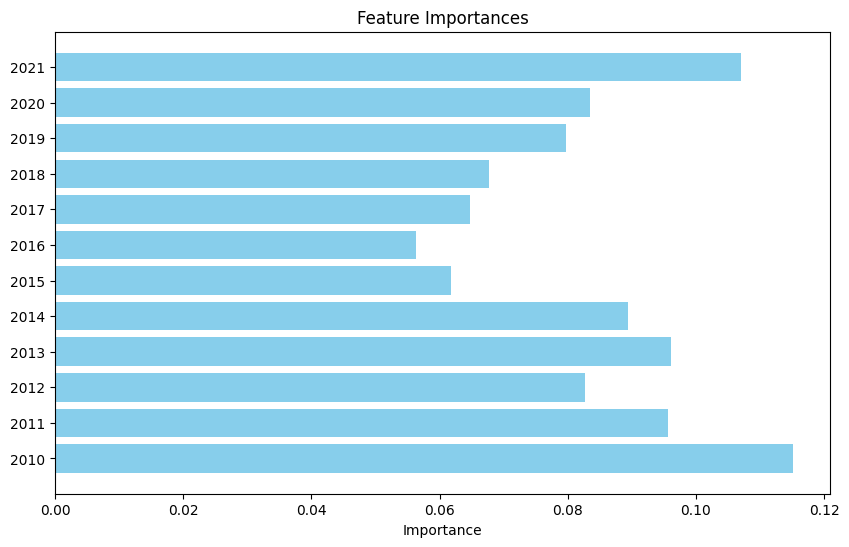

In [7]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation Score: -0.0934


In [9]:
# Create a new Random Forest model with the best parameters
optimized_rf = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Fit the optimized model on the training data
optimized_rf.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = optimized_rf.score(X_test, y_test)

print(f"Test Score: {test_score:.4f}")


Test Score: -0.0810


In [16]:
# Step 1: Extract data for Adams, IN
adams_data = pd.DataFrame(data_pivoted.loc['Adams, IN']).T  # Extract and transpose to get descriptions as columns
print("Adams, IN Data (Before Processing):")
print(adams_data.head())  # Check a sample of the data

# Step 2: Ensure all data is numeric
adams_data_numeric = adams_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coerce errors to NaN
print("\nAdams, IN Data (After Ensuring Numeric Values):")
print(adams_data_numeric.dtypes)  # Check data types to ensure they're numeric

# Step 3: Calculate correlation matrix
if len(adams_data_numeric.columns) > 1:
    adams_correlation_matrix = adams_data_numeric.corr()  # Calculate correlation matrix between columns
    print("\nAdams, IN Correlation Matrix:")
    print(adams_correlation_matrix)
else:
    print("Not enough data for correlation.")


Adams, IN Data (Before Processing):
                          2010                                         \
Description All industry total Personal income (thousands of dollars)   
Adams, IN              0.01177                               0.020184   

                                                                         \
Description Population (persons) 3/ Total employment Wages and salaries   
Adams, IN                  0.031551         0.024186           0.013208   

                          2011                                         \
Description All industry total Personal income (thousands of dollars)   
Adams, IN             0.012597                               0.021068   

                                                                         ...  \
Description Population (persons) 3/ Total employment Wages and salaries  ...   
Adams, IN                  0.031231         0.023969             0.0129  ...   

                          2020                           

## Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create the model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the training set
train_score = linear_model.score(X_train, y_train)
print(f"Training R² score: {train_score:.4f}")

# Evaluate the model on the testing set
test_score = linear_model.score(X_test, y_test)
print(f"Testing R² score: {test_score:.4f}")

In [ ]:
# Assuming your DataFrame is named X
# Get the coefficients
coefficients = linear_model.coef_

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients, color='skyblue')  # Use the correct DataFrame name
plt.title('Linear Regression Coefficients')
plt.xlabel('Features (Years)')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.axhline(0, color='black', lw=0.8)
plt.grid(axis='y')
plt.show()
